# Python libraries for Extreme Analysis

<p style="background:w">
<code style="background:blue;color:white">pyextremes
</code>
</p>
Documentation: <a href="https://georgebv.github.io/pyextremes/">https://georgebv.github.io/pyextremes/</a>
<br>
<p style="background:w">
<code style="background:white;color:blue">pip install pyextremes
</code>
</p>

In [1]:
import os
import os.path as op

import numpy as np
from scipy.io import loadmat
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt

# pyextremes
from pyextremes import EVA, __version__

## 1. Input Waves 

### 1.1. Load Dataset

In [2]:
p_db = op.join(os.getcwd(),'..','..','data','Buoys')

# database waves (mat file)
p_dat = op.join(p_db, 'Bilbao-Vizcaya Ext.mat')

# database exploration
data_mat = loadmat(p_dat)

array = data_mat[list(data_mat.keys())[-1]]

data = pd.DataFrame(
    {
        'year': array[:,0],
        'month': array[:,1],
        'day': array[:,2],
        'hour': array[:,3],
        'hs': array[:,4],
        'tm': array[:,5],
        'tp': array[:,6],
        'dir': array[:,9],
        'dirp': array[:,10],
        'sprp': array[:,11],
        'spr': array[:,12],
    }
)

data['dates'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data = data.drop(['year', 'month', 'day', 'hour'], axis=1).set_index('dates')
data

,hs,tm,tp,dir,dirp,sprp,spr
dates,,,,,,,
1990-11-07 12:00:00,1.1,3.8,4.8,96.0,86.0,33.0,NaN
1990-11-07 15:00:00,1.1,4.0,5.4,98.0,76.0,30.0,NaN
1990-11-07 18:00:00,1.0,3.8,4.8,112.0,91.0,43.0,NaN
1990-11-07 21:00:00,1.2,4.0,4.7,100.0,86.0,20.0,NaN
1990-11-08 00:00:00,1.3,4.2,5.2,104.0,88.0,22.0,NaN
...,...,...,...,...,...,...,...
2009-07-19 01:00:00,1.9,5.4,7.4,309.0,309.0,26.0,31.741249
2009-07-19 02:00:00,1.9,5.6,7.7,310.0,317.0,27.0,30.866975
2009-07-19 03:00:00,1.8,5.6,7.7,309.0,315.0,28.0,31.688137


### Initialize EVA object

In [3]:
hs = data['hs']
model = EVA(data=hs)

In [4]:
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                            hs      Size:                              59,119
Start:                      November 1990      End:                            July 2009
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Extreme values have not been extracted
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fit to the extremes

### Extract extreme values

In [5]:
model.get_extremes(
    method="BM",
    extremes_type="high",
    block_size="365.2425D",
    errors="raise",
)
model


                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                            hs      Size:                              59,119
Start:                      November 1990      End:                            July 2009
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 19      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fi

(<Figure size 768x480 with 1 Axes>, <AxesSubplot:xlabel='dates', ylabel='hs'>)

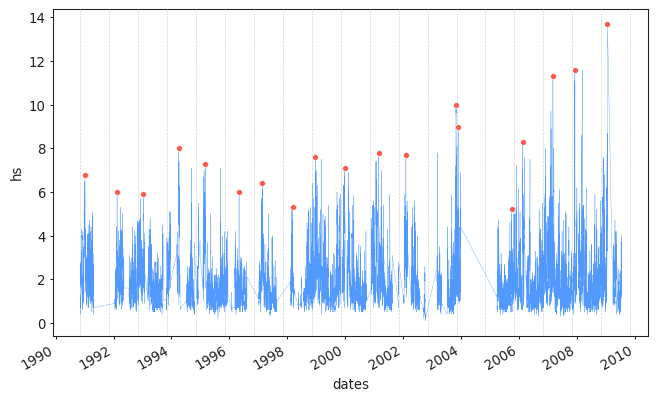

In [6]:

model.plot_extremes()


### Fit a model

In [7]:
model.fit_model()
model


                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                            hs      Size:                              59,119
Start:                      November 1990      End:                            July 2009
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 19      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

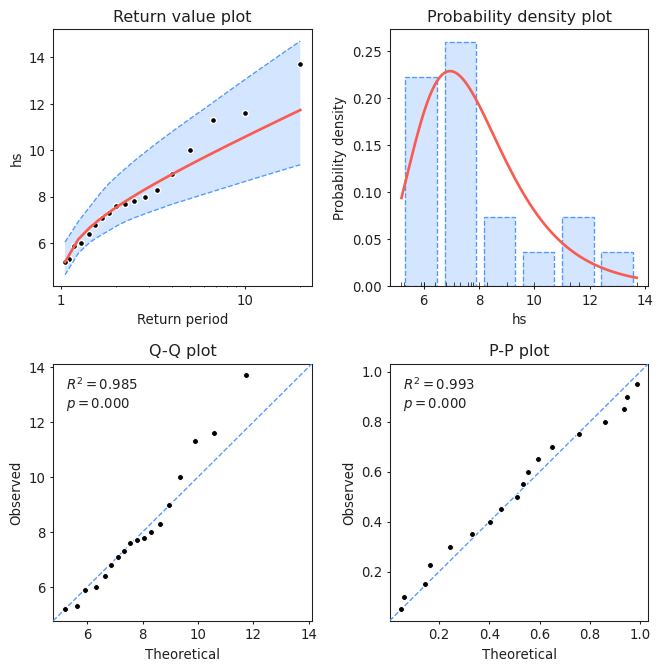

In [8]:
model.plot_diagnostic(alpha=0.95)
plt.show()

### Get output¶

As the extreme values have been extracted and a model has been fit to the data, we are ready to produce a return value plot and get a summary of projected extreme return values. Let's do this:

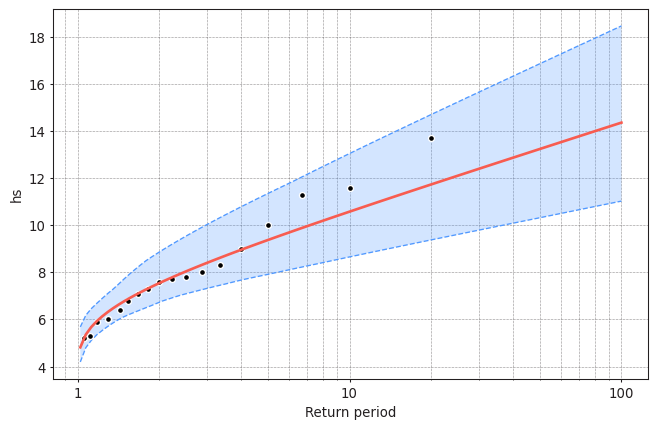

In [9]:
model.plot_return_values(
    return_period=np.logspace(0.01, 2, 100),
    return_period_size="365.2425D",
    alpha=0.95,
)
plt.show()

### POT

In [10]:
model_POT = EVA(data=hs)

In [11]:
model_POT.get_extremes(
    method="POT",
    extremes_type="high",
    threshold=np.percentile(hs, 98),
    r="5D",
)
model_POT

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                            hs      Size:                              59,119
Start:                      November 1990      End:                            July 2009
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 77      Extraction method:                    POT
Type:                                high      Threshold:                            5.3
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fi

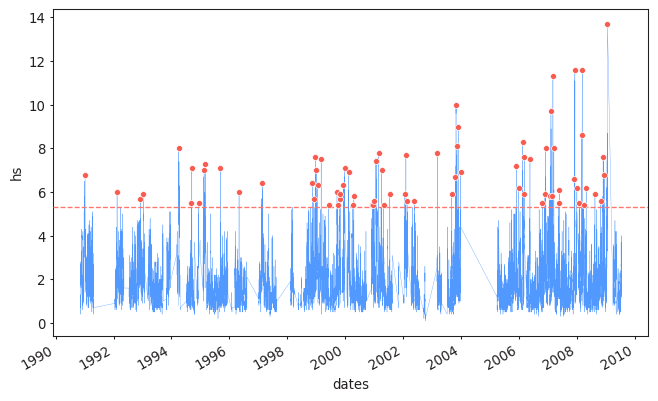

In [12]:
model_POT.plot_extremes();
plt.show()

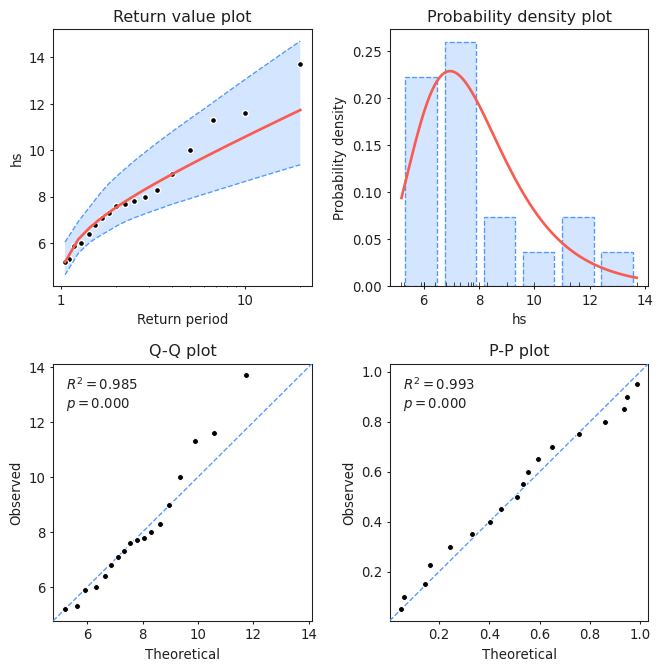

In [13]:
model.plot_diagnostic(alpha=0.95)
plt.show()

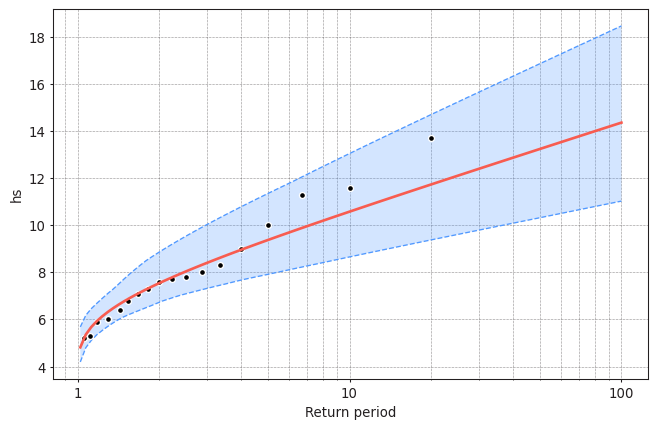

In [14]:
model.plot_return_values(
    return_period=np.logspace(0.01, 2, 100),
    return_period_size="365.2425D",
    alpha=0.95,
)
plt.show()